## Regression Project

### Problem Statement
Agricultural activities have a negative impact on the enironment by contributing to CO2 emissions which in turn impacts climate change.

In [20]:
##these are the packages needed for data cleaning and eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Import the dataset

In [207]:
df = pd.read_csv("co2_emissions_from_agri.csv")


### Data Overview
After importing the data, I'm going to get a high level overview to understand its structure.

In [208]:
#inspect the top 5 rows
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [192]:
#inspect the bottom 5 rows
pd.set_option("display.max_columns", 31)
df.tail()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.9108,1077.2392,317.0744,2585.080847,858.982,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.9857,1093.3441,332.7759,1227.240253,889.425,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.0570,1108.5523,348.5107,1127.687805,966.265,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.9514,1121.3255,327.8209,2485.528399,945.942,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.420,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


In [5]:
#Check the shape of the data, i.e., how many columns and rows the dataframe consists of
df.shape

(6965, 31)

The dataframe consists:
1. Columns = 6965
2. Rows = 31

In [6]:
#Get a summary of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

- All datatypes in the dataframe seem to be correct, with the "Area" feature being an object, the "Year" feature being an int, and the rest of the columns being floats. 

- Each column should have a total of 6965 non-null values. 

- Notice that some columns have null values that will need to be looked at. 

In [33]:
df.describe()


,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


#### The above describe function gives us a better view of our descriptive statistics:
    - 

In [214]:
#create function that outputs columns with null values 
def columns_with_NANs(df):
    
    nan_cols = df.columns[df.isnull().sum() > 0].tolist()
    return nan_cols

columns_with_NANs(df)

['Forest fires',
 'Crop Residues',
 'Forestland',
 'Net Forest conversion',
 'Food Household Consumption',
 'IPPU',
 'Manure applied to Soils',
 'Manure Management',
 'Fires in humid tropical forests',
 'On-farm energy use']

In [216]:
nan_cols = ['Savanna fires',
 'Forest fires',
 'Crop Residues',
 'Forestland',
 'Net Forest conversion',
 'Food Household Consumption',
 'IPPU',
 'Manure applied to Soils',
 'Manure Management',
 'Fires in humid tropical forests',
 'On-farm energy use']

nan_counts = df[nan_cols].isnull().sum().sort_values(ascending = True)


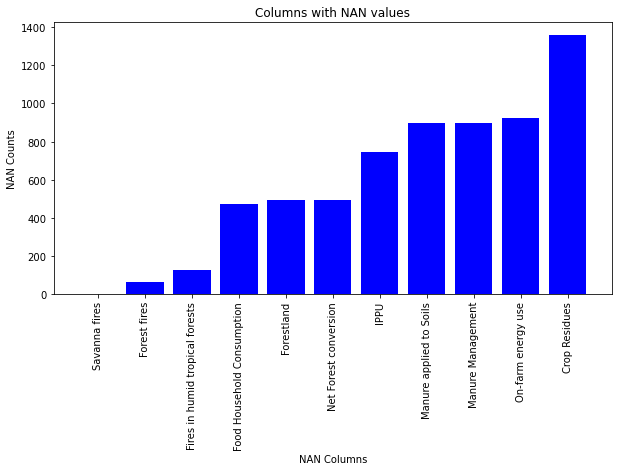

In [217]:
#create plot to visualise NAN values
plt.figure(figsize=(10,5))
plt.bar(nan_counts.index, nan_counts.values, color = 'blue')
plt.xlabel("NAN Columns")
plt.ylabel("NAN Counts")
plt.title("Columns with NAN values")
plt.xticks(rotation = 90)
plt.show()

#### NAN values
I will need to find a way to deal with these missing values. A large number of our columns have missing values, with Crop Residuals having over 1000 missing values. I'll need to come up with a strategy. These columns contain NAN's:
['Savanna fires',
 'Forest fires',
 'Crop Residues',
 'Forestland',
 'Net Forest conversion',
 'Food Household Consumption',
 'IPPU',
 'Manure applied to Soils',
 'Manure Management',
 'Fires in humid tropical forests',
 'On-farm energy use']

#### I'm going to look at how well countries are represented in the dataframe
Let's look at the unique value counts in the dataset for each Area, but before we do that, I'll rename area to country

In [210]:
#rename area column name to country
df = df.rename(columns = {'Area': 'Country'})

In [196]:
df.shape

(6965, 31)

We can see that the df shape is still the same. We will now see Country instead of Area

In [200]:
#Understand NANs in Savanna fires feature
nan_savanna_fires = df[df['Savanna fires'].isna()]
nan_savanna_fires

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
2835,Holy See,1990,NaN,NaN,NaN,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0466,112.135517,67.631366,65.072347,451.196291,2361.124955,0.6382,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,768.0,340.0,370.0,18688.406793,0.905583
2836,Holy See,1991,NaN,NaN,NaN,9654.499823,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0457,112.135517,67.631366,65.072347,451.196291,2361.124955,0.6414,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,774.0,330.0,360.0,18726.641610,-0.098083
2837,Holy See,1992,NaN,NaN,NaN,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0433,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6399,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,779.0,330.0,360.0,18684.924938,0.773167
2838,Holy See,1993,NaN,NaN,NaN,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0107,0.0230,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6012,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,778.0,330.0,360.0,18684.874838,0.564417
2839,Holy See,1994,NaN,NaN,NaN,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0184,0.0254,112.135517,67.631366,65.072347,451.196291,2357.644701,0.5894,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,778.0,320.0,350.0,18717.728958,1.444500
2840,Holy See,1995,NaN,NaN,NaN,9687.355642,0.0,11.481085,26.262663,0.0,0.0,0.0024,0.0095,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6334,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,780.0,320.0,350.0,18755.973575,0.267167
2841,Holy See,1996,NaN,NaN,NaN,9687.355642,0.0,11.481085,26.262663,0.0,0.0,0.0031,0.0146,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6360,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,778.0,320.0,350.0,18755.981975,0.245167
2842,Holy See,1997,NaN,NaN,NaN,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0029,0.0114,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6444,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,782.0,320.0,340.0,18717.754458,0.889583
2843,Holy See,1998,NaN,NaN,NaN,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0030,0.0201,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6658,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,781.0,320.0,340.0,18717.784658,0.778250
2844,Holy See,1999,NaN,NaN,NaN,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0025,0.0271,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6923,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,781.0,310.0,340.0,18717.817658,0.926500


#### Notes:
- Holy See has NaN values across all the years for Savanna fires, Forest fires, and Crop residues. 
- Based on this, I'm going to go with an approach to fill these values with 0.
- I also noticed that there are a couple of features in the df above where the value 0 is consistent across the years.
- Based on addititonal research, we can confirm that the 0 value in the forestland feature speaks to savanna fires, forest fires, and crop residues.
- We can also assume that there's no data for Manure applied to soil. We'll make this 0 indicating that the country does not have data for this feature.
- I'll apply the same thinking to the 'On farm energy use feature'. Further research suggests that farms in the country make use of solar energy. 
- Manure Management: We have missing values for this featrue indicating that this is possibly not a practice in the country.

### Fill NaN's in df features with 0 where country name is Holy See

In [212]:
df[df['Country'] == 'Holy See'] = df[df['Country'] == 'Holy See'].fillna(0)

In [213]:
df[df['Country'] == 'Holy See']

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
2835,Holy See,1990,0.0,0.0,0.0,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0466,112.135517,67.631366,65.072347,451.196291,2361.124955,0.6382,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,768.0,340.0,370.0,18688.406793,0.905583
2836,Holy See,1991,0.0,0.0,0.0,9654.499823,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0457,112.135517,67.631366,65.072347,451.196291,2361.124955,0.6414,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,774.0,330.0,360.0,18726.641610,-0.098083
2837,Holy See,1992,0.0,0.0,0.0,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0433,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6399,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,779.0,330.0,360.0,18684.924938,0.773167
2838,Holy See,1993,0.0,0.0,0.0,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0107,0.0230,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6012,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,778.0,330.0,360.0,18684.874838,0.564417
2839,Holy See,1994,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0184,0.0254,112.135517,67.631366,65.072347,451.196291,2357.644701,0.5894,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,778.0,320.0,350.0,18717.728958,1.444500
2840,Holy See,1995,0.0,0.0,0.0,9687.355642,0.0,11.481085,26.262663,0.0,0.0,0.0024,0.0095,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6334,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,780.0,320.0,350.0,18755.973575,0.267167
2841,Holy See,1996,0.0,0.0,0.0,9687.355642,0.0,11.481085,26.262663,0.0,0.0,0.0031,0.0146,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6360,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,778.0,320.0,350.0,18755.981975,0.245167
2842,Holy See,1997,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0029,0.0114,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6444,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,782.0,320.0,340.0,18717.754458,0.889583
2843,Holy See,1998,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0030,0.0201,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6658,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,781.0,320.0,340.0,18717.784658,0.778250
2844,Holy See,1999,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0025,0.0271,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6923,0.0,5976.490513,0.0,0.058149,0.0,0.0,0.0,781.0,310.0,340.0,18717.817658,0.926500


I've managed to add fill all the NaN's for Holy See, which also removed all the NaN's in the Savanna fires feature. Even though the initial code was to find the NaNs for one feature, we got lucky because it belonged to one country, which gave us the opportunity to further investigate the subset of data for Holy See. 

I'm going to change my approach slightly by looking for all countries with NaNs. I'll then investigate the missing values in each country to get a better understanding of what's missing and why. 

In [225]:
def null_value_counter(dataframe):
    
    ''''This function finds the count of null values for each country'''
    
    nulls = df.isnull().any(axis = 1)
    countries_with_null = df[nulls]['Country']
    return countries_with_null.unique()

countries_with_nans = null_value_counter(df).tolist()

countries_with_nans

['Afghanistan',
 'American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahrain',
 'Belgium-Luxembourg',
 'Bermuda',
 'British Virgin Islands',
 'Burkina Faso',
 'Cameroon',
 'Cayman Islands',
 'Channel Islands',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of',
 'Cook Islands',
 'Czechoslovakia',
 'Democratic Republic of the Congo',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Ethiopia PDR',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'Fiji',
 'French Polynesia',
 'Gambia',
 'Germany',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Iraq',
 'Isle of Man',
 'Kiribati',
 'Kuwait',
 'Lesotho',
 'Liberia',
 'Libya',
 'Liechtenstein',
 'Madagascar',
 'Maldives',
 'Marshall Islands',
 'Martinique',
 'Mayotte',
 'Micronesia (Federated States of)',
 'Monaco',
 'Montserrat',
 'Namibia',
 'Nauru',
 'Netherlands Antilles (former)',
 'New Caledonia',
 'Niger',
 'Niue',
 'North Macedonia',
 'Northern Mariana Islands',
 'Oman',
 'Pa

In [226]:
def investigate_nan_columns(df, countries_list):
    '''This function investigates NaN values in the specified countries and returns a summary of columns with NaNs'''
    
    # Filter the dataframe for the countries in the provided list
    filtered_df = df[df['Country'].isin(countries_list)]
    
    # Create an empty dictionary to store the results
    nan_summary = {}

    # Iterate over the countries
    for country in countries_list:
        # Filter for the specific country
        country_df = filtered_df[filtered_df['Country'] == country]
        
        # Find the columns where NaNs exist in this country's data
        nan_columns = country_df.columns[country_df.isnull().any()].tolist()
        
        # Add the result to the summary
        nan_summary[country] = nan_columns
    
    # Return the summary of columns with NaNs for each country
    return nan_summary


# Run the investigation
nan_summary = investigate_nan_columns(df, countries_with_nans)

# Display the results
for country, columns in nan_summary.items():
    if columns:
        print(f"{country} has NaNs in the following columns: {columns}")
    else:
        print(f"{country} has no NaNs.")


Afghanistan has NaNs in the following columns: ['On-farm energy use']
American Samoa has NaNs in the following columns: ['Crop Residues', 'IPPU', 'Manure applied to Soils', 'Manure Management']
Andorra has NaNs in the following columns: ['Crop Residues', 'Manure applied to Soils', 'Manure Management']
Anguilla has NaNs in the following columns: ['Crop Residues', 'Forestland', 'Net Forest conversion', 'Manure applied to Soils', 'Manure Management']
Antigua and Barbuda has NaNs in the following columns: ['Forestland', 'Net Forest conversion']
Aruba has NaNs in the following columns: ['Crop Residues', 'Manure applied to Soils', 'Manure Management']
Bahrain has NaNs in the following columns: ['Crop Residues', 'On-farm energy use']
Belgium-Luxembourg has NaNs in the following columns: ['Food Household Consumption', 'On-farm energy use']
Bermuda has NaNs in the following columns: ['Crop Residues', 'Forestland', 'Net Forest conversion', 'IPPU', 'Manure applied to Soils', 'Manure Management']


I'm picking up a trend in the Crop Residue feature and it seems like most countries have a NaN for this feature. Let's understand it more.

In [242]:
df[df['Country'] == 'Samoa']

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
5448,Samoa,1990,0.0,0.6931,NaN,1011.444081,0.0,1.0,4.7312,2.5125,104.8736,2.1410,2.1682,17.004663,67.631366,7.5613,209.587728,2329.417463,2.0598,8.0307,14.4537,83.1785,0.0,0.6931,2.2132,128338.0,34528.0,88451.0,79735.0,3871.395202,0.427083
5449,Samoa,1991,0.0,0.6931,NaN,1011.444081,0.0,1.0,5.4558,2.5125,104.8736,2.3208,2.2801,17.004663,67.631366,7.5796,209.587728,2329.417463,2.0851,7.8830,14.9956,81.1958,0.0,0.6931,2.3995,129292.0,34784.0,88650.0,80051.0,3871.052902,0.436833
5450,Samoa,1992,0.0,0.6931,NaN,1011.444081,0.0,1.0,6.1801,2.5125,104.8736,2.4860,2.4283,17.004663,67.631366,7.6328,209.587728,2329.417463,2.0930,7.7013,14.4247,78.9271,0.0,0.6931,2.6253,130372.0,35198.0,89130.0,80669.0,3869.356202,0.320250
5451,Samoa,1993,0.0,0.6931,NaN,1011.444081,0.0,1.0,6.8832,2.5125,104.8736,2.4213,2.6194,17.004663,67.631366,7.7033,209.587728,2329.417463,2.1210,7.8526,14.9669,80.3582,0.0,0.6931,2.8077,131513.0,35694.0,89836.0,81526.0,3872.591202,-0.132000
5452,Samoa,1994,0.0,0.6931,NaN,1011.444081,0.0,1.0,7.4685,2.5125,104.8736,2.4984,2.6351,17.004663,67.631366,7.7801,209.587728,2329.417463,2.1416,7.9122,15.5085,80.8487,0.0,0.6931,2.8491,132606.0,36182.0,90639.0,82468.0,3874.499802,0.242167
5453,Samoa,1995,0.0,0.6931,NaN,1011.444081,0.0,1.0,8.0697,2.5125,104.8736,2.6594,3.0897,17.004663,67.631366,7.7915,209.587728,2329.417463,2.1869,7.6135,15.4903,77.0594,0.0,0.6931,2.9852,133529.0,36628.0,91472.0,83430.0,3871.803202,0.680750
5454,Samoa,1996,0.0,2.2112,NaN,1011.444081,0.0,1.0,8.2804,2.5125,104.8736,2.7438,3.6026,17.004663,67.631366,7.9353,209.587728,2529.519966,2.2249,7.6435,15.4764,77.0702,0.0,2.2112,3.0283,134259.0,37024.0,92314.0,84399.0,4076.001704,0.729750
5455,Samoa,1997,0.0,2.2112,NaN,921.664109,0.0,1.0,8.5006,2.5125,104.8736,2.7955,4.4155,17.004663,67.631366,7.7407,209.587728,2529.519966,2.2502,7.6571,15.4617,77.0744,0.0,2.2112,3.1088,134822.0,37376.0,93165.0,85378.0,3987.220832,0.281667
5456,Samoa,1998,0.0,5.0006,NaN,921.664109,0.0,0.0,8.6059,2.5125,104.8736,2.9621,4.7697,17.004663,67.631366,7.8494,209.587728,2529.519966,2.2528,7.7007,16.0079,77.2784,0.0,5.0006,3.1818,135279.0,37702.0,94023.0,86362.0,3993.403832,0.833000
5457,Samoa,1999,0.0,2.4436,NaN,921.664109,0.0,0.0,8.7619,2.5125,104.8736,2.8896,4.9530,17.004663,67.631366,7.9210,209.587728,2529.519966,2.2781,7.6477,16.4422,76.2998,0.0,2.4436,3.3521,135727.0,38028.0,94879.0,87332.0,3988.226532,0.169750


In [237]:
df[df['Crop Residues'].isna()].tail(500)

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
4681,Northern Mariana Islands,1994,0.0000,0.0000,NaN,1680.010525,0.0,11.481085,1.681300,-3.6046,146.9274,0.7654,35.406959,17.004663,77.393651,1.622500,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,11.7702,5556.0,47824.0,24677.0,23102.0,6585.699196,0.646215
4682,Northern Mariana Islands,1995,0.0000,0.0000,NaN,1680.010525,0.0,11.481085,1.876900,-3.6046,146.9274,0.7654,35.406959,17.004663,77.393651,1.640700,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,11.8330,5877.0,50401.0,24921.0,23796.0,6585.975796,0.653281
4683,Northern Mariana Islands,1996,0.0000,0.0000,NaN,1680.010525,0.0,11.481085,1.876900,-3.6046,146.9274,0.7654,35.406959,17.004663,77.393651,1.699600,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,11.5445,6141.0,53223.0,26785.0,26582.0,6585.746196,0.349161
4684,Northern Mariana Islands,1997,0.0000,0.0000,NaN,1680.010525,0.0,11.481085,2.052500,-3.6046,146.9274,0.7654,35.406959,17.004663,77.393651,1.790300,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,12.4179,6388.0,56140.0,29896.0,30921.0,6586.885896,0.658963
4685,Northern Mariana Islands,1998,0.0000,0.0000,NaN,1410.445506,0.0,11.481085,2.052500,-3.6046,146.9274,1.0208,35.406959,17.004663,77.393651,1.895700,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,16.8513,6605.0,58869.0,33136.0,35364.0,6322.115076,0.827400
4686,Northern Mariana Islands,1999,0.0000,0.0000,NaN,1680.010525,0.0,11.481085,2.151100,-3.6046,146.9274,1.0208,35.406959,17.004663,77.393651,1.989900,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,13.0210,6750.0,61005.0,36405.0,39831.0,6588.042596,0.791336
4687,Northern Mariana Islands,2000,0.0000,0.0000,NaN,1746.105511,0.0,11.481085,2.347900,-3.6046,146.9274,1.0208,35.406959,17.004663,77.393651,2.055000,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,9.7644,6804.0,62290.0,38212.0,42127.0,6651.142881,0.791336
4688,Northern Mariana Islands,2001,0.0000,0.0000,NaN,1746.105511,0.0,11.481085,2.348600,-2.8753,146.2219,1.0303,35.406959,17.004663,77.393651,2.086000,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,9.5117,6776.0,62612.0,38008.0,41471.0,6650.955181,0.793954
4689,Northern Mariana Islands,2002,0.0000,0.0000,NaN,1746.105511,0.0,11.481085,2.622800,-2.8753,146.2219,1.0446,35.406959,17.004663,77.393651,2.089300,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,9.6481,6659.0,62104.0,37181.0,39980.0,6651.383381,0.805334
4690,Northern Mariana Islands,2003,0.0000,0.0000,NaN,1746.105511,0.0,11.481085,2.623600,-2.8753,146.2219,1.0555,35.406959,17.004663,77.393651,2.072900,451.196291,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,9.8802,6474.0,60948.0,36233.0,38389.0,6651.610781,0.805334


In [239]:
df[df['Country'] == 'Ethiopia']

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
2124,Ethiopia,1993,3828.4592,1506.1799,265.1248,21.1680,5504.6700,4.0,95.4110,135.8757,19405.8333,4.2869,25.5262,17.004663,67.631366,5581.5515,451.196291,516.009027,194.1876,274.5788,14355.4072,1243.3381,0.0,416.3368,NaN,46375843.0,7157113.0,26854459.0,26937213.0,53913.776347,0.146333
2125,Ethiopia,1994,3828.4592,1506.1799,307.1900,19.5490,5504.6700,4.0,106.4599,135.8757,19405.8333,2.5710,25.9981,17.004663,67.631366,5664.3178,451.196291,516.009027,244.2342,292.4717,14449.2189,1246.9531,0.0,416.3368,70.3458,47877390.0,7553733.0,27785476.0,27834734.0,54282.505747,0.476833
2126,Ethiopia,1995,3828.4592,1506.1799,389.8066,23.1280,5544.2806,4.0,119.2300,135.8757,19405.8333,3.3148,27.5713,17.004663,67.631366,5761.1667,451.196291,380.673218,305.3263,277.8137,14467.3627,1246.8893,0.0,416.3368,80.8992,49385397.0,7924483.0,28728074.0,28748462.0,54459.979638,0.802250
2127,Ethiopia,1996,4029.7012,951.6280,510.0050,20.8818,5551.4316,6.0,132.7070,135.8757,19405.8333,3.2100,29.8403,17.004663,67.631366,5860.9088,451.196291,516.009027,339.7050,290.3530,15120.7360,1299.3854,0.0,9.6859,91.4526,50869776.0,8285372.0,29679084.0,29668565.0,54841.181947,0.603750
2128,Ethiopia,1997,3899.0235,2897.8736,495.9857,25.4800,5555.4115,6.0,140.8857,135.8757,19405.8333,2.5578,30.9392,17.004663,67.631366,5945.5395,451.196291,380.673218,365.1272,302.9691,15740.4544,1350.1298,0.0,224.9896,102.0088,52326119.0,8650331.0,30643051.0,30590429.0,57543.589938,0.625500
2129,Ethiopia,1998,4933.5323,2727.8623,408.5170,27.4400,5595.9309,7.0,154.0522,135.8757,19405.8333,2.9250,11.4144,17.004663,67.631366,6015.0296,451.196291,380.673218,366.4950,327.9587,17116.6871,1458.7044,0.0,167.5379,112.5622,53771445.0,9022706.0,31616973.0,31519520.0,59891.863538,0.694750
2130,Ethiopia,1999,4929.9766,4008.9409,465.2749,29.4000,5643.1109,9.0,158.3504,135.8757,19405.8333,1.0385,15.4278,17.004663,67.631366,6102.3244,451.196291,380.673218,322.2680,324.9997,16835.3662,1434.9629,0.0,418.2720,116.0721,55232981.0,9407073.0,32605500.0,32472079.0,61272.999838,0.330583
2131,Ethiopia,2000,4653.2991,3165.6368,441.2454,32.1440,5641.7776,12.0,173.9541,135.8757,19405.8333,1.1499,21.1514,17.004663,67.631366,6192.4652,451.196291,380.673218,423.1587,303.1464,15805.5492,1352.9595,0.0,441.2528,130.1354,56730042.0,9807289.0,33605361.0,33426506.0,59249.240038,0.615083
2132,Ethiopia,2001,3386.7090,892.0442,544.2745,32.7869,5658.9660,2.0,216.9105,-5960.8296,30060.1136,0.9275,27.6654,17.004663,69.901897,6279.6415,483.126100,380.673218,432.6122,335.3053,17008.6009,1458.7859,0.0,285.1385,161.7984,58268076.0,10224181.0,34630056.0,34388876.0,61774.156578,0.775250
2133,Ethiopia,2002,4623.1671,1085.5432,487.2849,30.1840,5712.6352,16.0,227.5411,-5960.8296,30060.1136,1.0151,32.1218,17.004663,69.901897,6357.8512,483.126100,380.673218,433.3663,344.0645,19402.7175,1672.8225,0.0,459.5002,172.3518,59839634.0,10657558.0,35686336.0,35386878.0,66108.156278,1.070750


Next, I'm going to look at how well country data is represented in the df. I'm going to use the year column to help me with this. In order for the country to contribute towards our end goal in creating a regression model, it needs to be well represented. We cannot rely on data fora country that only has a handful of records in the df. 

In [117]:
years_list = df['Year'].unique().tolist()
years_list

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

Our years range from 1990 - 2020. Now, I'm going to look for countries that only have data for a max of 10 years. 

In [128]:
country_unique = df['Country'].value_counts().sort_values(ascending = True)

In [133]:
country_unique

Pacific Islands Trust Territory                          1
Yugoslav SFR                                             2
USSR                                                     2
Czechoslovakia                                           3
Ethiopia PDR                                             3
Sudan                                                    9
South Sudan                                              9
Belgium-Luxembourg                                      10
Serbia and Montenegro                                   14
Serbia                                                  15
Montenegro                                              15
Belgium                                                 21
Netherlands Antilles (former)                           21
Luxembourg                                              21
Sudan (former)                                          22
Ethiopia                                                28
Slovakia                                                

In [137]:
low_rep_countries = country_unique[country_unique <= 10]

low_rep_countries = low_rep_countries.index.tolist()

In [143]:
df[df['Country'].isin(low_rep_countries)]

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
604,Belgium-Luxembourg,1990,0.0324,0.0766,140.6770,671.694444,220.1315,76.000000,1206.558928,-5741.1640,1006.9151,NaN,1314.116536,643.580231,965.851258,2047.1507,1959.533307,1483.907160,11554.3849,1054.8543,607.826900,2830.5190,0.0,0.0000,NaN,435275.0,9953060.0,5054720.0,5286106.0,22042.646264,1.333333
605,Belgium-Luxembourg,1991,0.0324,0.0766,146.0505,715.871244,220.1315,73.000000,1206.558928,-5741.1640,1006.9151,NaN,1306.805554,643.580231,965.851258,2171.4330,1959.533307,1470.287917,11481.5726,1065.4845,622.216200,2830.1924,0.0,0.0000,NaN,428236.0,9997561.0,5071466.0,5302003.0,22144.429238,0.258083
606,Belgium-Luxembourg,1992,0.0324,0.0766,146.7920,715.871244,220.1315,92.000000,1206.558928,-5741.1640,1006.9151,NaN,1314.116536,643.580231,965.851258,2295.9218,1959.533307,1612.106476,12118.9883,1060.6614,611.776100,2816.7688,0.0,0.0000,NaN,420750.0,10048745.0,5088906.0,5319065.0,23046.517980,1.104833
607,Belgium-Luxembourg,1993,0.0324,0.0766,150.5332,715.871244,219.8283,64.000000,1206.558928,-5741.1640,1006.9151,NaN,1306.805554,643.580231,965.851258,2419.1849,1959.533307,1636.885005,12358.1168,1074.3482,607.826900,2859.0516,0.0,0.0000,NaN,413776.0,10101708.0,5105106.0,5335330.0,23453.835526,0.486333
608,Belgium-Luxembourg,1994,0.0324,0.0766,144.9024,719.936921,218.6286,537.000000,1232.457796,-5741.1640,1006.9151,NaN,1314.116536,643.580231,965.851258,2542.3570,2185.796722,1894.112867,13483.9186,1081.5439,605.502600,2861.5410,0.0,0.0000,NaN,405609.0,10152743.0,5120435.0,5350790.0,25697.106531,1.635583
609,Belgium-Luxembourg,1995,0.0324,0.0766,143.6960,845.955817,214.8385,751.000000,1884.429239,-5741.1640,1006.9151,NaN,1314.116536,643.580231,1016.585975,2665.1958,2216.580674,1953.627245,15496.5118,1103.6214,617.779000,2902.5083,0.0,0.0000,NaN,398155.0,10196299.0,5135933.0,5366900.0,29035.886618,1.112833
610,Belgium-Luxembourg,1996,0.0011,0.2962,170.9103,892.809995,214.2725,796.000000,1968.407360,-5741.1640,1006.9151,NaN,1456.499231,683.338447,1060.760272,2679.0122,2314.871431,1953.627245,15755.1651,1108.1266,615.200400,2916.2974,0.0,0.0000,NaN,392514.0,10229760.0,5152365.0,5384067.0,29851.346880,-0.540333
611,Belgium-Luxembourg,1997,0.0007,0.2281,159.7195,864.708436,213.5146,239.000000,1910.664548,-5741.1640,1006.9151,NaN,1306.805554,643.580231,996.765059,2742.7349,1990.317258,1953.627245,16061.9450,1087.8601,601.315300,2873.2759,0.0,0.0000,NaN,386770.0,10256993.0,5170708.0,5402576.0,28911.813531,1.015333
612,Belgium-Luxembourg,1998,0.0007,0.2281,167.4899,864.708436,213.6423,258.000000,1920.647542,-5741.1640,1006.9151,NaN,1306.805554,643.580231,1027.548157,2767.9324,1990.317258,1953.627245,16712.5798,1096.4313,584.351900,2904.2862,0.0,0.0000,NaN,380405.0,10282727.0,5190365.0,5421745.0,29677.928124,0.960333
613,Belgium-Luxembourg,1999,0.0007,0.2281,159.2493,725.611768,215.0326,132.000000,1910.664548,-5741.1640,1006.9151,NaN,1314.116536,643.580231,1027.548157,2434.0747,1990.317258,1953.627245,16398.2221,1128.2194,618.348200,2992.8253,0.0,0.0000,NaN,372326.0,10314096.0,5211280.0,5442288.0,28909.417244,1.473583


In [176]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 1]

# Here I'm doing a for loop that iterates through each column in the 'features_with_na variable', which prints out the avg % missing values in a column.
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

Savanna fires 0.0045 % missing values
Forest fires 0.0134 % missing values
Crop Residues 0.1994 % missing values
Forestland 0.0708 % missing values
Net Forest conversion 0.0708 % missing values
Food Household Consumption 0.0679 % missing values
IPPU 0.1067 % missing values
Manure applied to Soils 0.1332 % missing values
Manure Management 0.1332 % missing values
Fires in humid tropical forests 0.0223 % missing values
On-farm energy use 0.1373 % missing values


['Afghanistan' 'American Samoa' 'Andorra' 'Anguilla' 'Antigua and Barbuda'
 'Aruba' 'Bahrain' 'Belgium-Luxembourg' 'Bermuda' 'British Virgin Islands'
 'Burkina Faso' 'Cameroon' 'Cayman Islands' 'Channel Islands'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, Taiwan Province of'
 'Cook Islands' 'Czechoslovakia' 'Democratic Republic of the Congo'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Ethiopia PDR'
 'Falkland Islands (Malvinas)' 'Faroe Islands' 'Fiji' 'French Polynesia'
 'Gambia' 'Germany' 'Gibraltar' 'Greenland' 'Guadeloupe' 'Guam' 'Holy See'
 'Iraq' 'Isle of Man' 'Kiribati' 'Kuwait' 'Lesotho' 'Liberia' 'Libya'
 'Liechtenstein' 'Madagascar' 'Maldives' 'Marshall Islands' 'Martinique'
 'Mayotte' 'Micronesia (Federated States of)' 'Monaco' 'Montserrat'
 'Namibia' 'Nauru' 'Netherlands Antilles (former)' 'New Caledonia' 'Niger'
 'Niue' 'North Macedonia' 'Northern Mariana Islands' 'Oman'
 'Pacific Islands Trust Territory' 'Palau' 'Palestine' 'Paraguay'
 'Puerto Rico' 'Saint Helena, As